# **Stock Price Prediction using Linear Regression and LTSM**

-------------

## **Objective**

To predict stock prices with Linear Regression and LSTM(Long Short Term Memory) models.


## **Data Source**

Yahoo finance

## **Import Library**

In [55]:
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

## **Import Data**

In [56]:
stocks = input("Enter the code of the stock:- ") 
data = yf.download(stocks, "2008-01-01", "2022-01-07", auto_adjust=True) 

[*********************100%***********************]  1 of 1 completed


In [57]:
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2008-01-01,157.709107,158.804306,155.345299,157.982910,99970
2008-01-02,158.713062,159.169396,154.697325,156.627625,431400
2008-01-03,155.153661,156.066329,154.240992,154.911804,4877980
2008-01-04,155.153664,156.979001,154.423526,154.920929,779430
2008-01-07,151.959294,153.401312,149.403820,151.229156,651070


## **Describe Data**

In [58]:
data.describe()

,Open,High,Low,Close,Volume
count,3454.000000,3454.000000,3454.000000,3454.000000,3.454000e+03
mean,591.019816,596.404172,584.417157,590.426114,7.094832e+05
std,439.496000,443.093693,435.113268,439.009861,2.567802e+06
min,72.506814,74.893129,71.038323,73.319092,0.000000e+00
25%,219.477677,221.759490,216.269770,218.761238,1.586475e+05
50%,459.688287,465.152849,455.304554,459.793671,3.250340e+05
75%,961.452708,969.122677,948.087608,960.242386,6.789875e+05
max,1709.949951,1724.300049,1671.150024,1688.949951,1.367140e+08


## **Data Visualization**

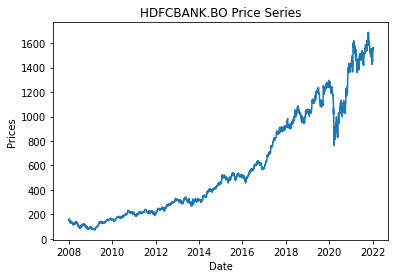

In [59]:
plt.plot(data['Close'])
plt.ylabel("Prices")
plt.xlabel("Date")
plt.title(f"{stocks} Price Series")
plt.show()

## **Data Preprocessing**

In [60]:
data.reset_index(inplace=True)

In [61]:
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(data['Close']).reshape(-1,1))

In [62]:
print(df)

[[0.05240295]
 [0.05156409]
 [0.05050208]
 ...
 [0.9006271 ]
 [0.92306415]
 [0.90774506]]


## **Define Target Variable (y) and Feature Variables (X)**

In [63]:
X = np.array(data.index).reshape(-1,1)
Y = data['Close']

In [64]:
X.shape, Y.shape

((3454, 1), (3454,))

In [65]:
training_size=int(len(df)*0.65)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [66]:
training_size,test_size

(2245, 1209)

In [67]:
train_data

array([[0.05240295],
       [0.05156409],
       [0.05050208],
       ...,
       [0.34807546],
       [0.34987006],
       [0.34991535]])

## **Train Test Split**

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, random_state=101)

In [69]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2245, 1), (1209, 1), (2245,), (1209,))

In [70]:
print(Y_train)

970      202.159119
1809     475.048950
3288    1397.649902
3249    1549.094482
2097     584.562988
           ...     
599      182.290421
1599     391.168823
1361     313.606476
1547     350.996643
863      233.744446
Name: Close, Length: 2245, dtype: float64


In [71]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0] 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [72]:
time_step = 100
X_train1, y_train1 = create_dataset(train_data, time_step)
X_test1, ytest1 = create_dataset(test_data, time_step)

In [73]:
X_train1.shape, y_train1.shape, X_test1.shape, ytest1.shape

((2144, 100), (2144,), (1108, 100), (1108,))

In [74]:
X_train1 = X_train1.reshape(X_train1.shape[0], X_train1.shape[1], 1)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], 1)

## **Modeling**

In [75]:
scaler = StandardScaler().fit(X_train)
lm = LinearRegression()
lm.fit(X_train, Y_train)


LinearRegression()

In [76]:
Y_pred = lm.predict(X_train)
Y_pred

array([ 273.90466831,  625.00848244, 1243.93880555, ...,  437.52992615,
        515.36700532,  229.12742384])

In [77]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [78]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [79]:
model.fit(X_train1,y_train1,validation_data=(X_test1,ytest1),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
34/34 [==============================] - 32s 591ms/step - loss: 0.0033 - val_loss: 0.0095
Epoch 2/100
34/34 [==============================] - 16s 477ms/step - loss: 1.2989e-04 - val_loss: 0.0014
Epoch 3/100
34/34 [==============================] - 20s 600ms/step - loss: 6.4301e-05 - val_loss: 0.0018
Epoch 4/100
34/34 [==============================] - 21s 614ms/step - loss: 6.0399e-05 - val_loss: 0.0023
Epoch 5/100
34/34 [==============================] - 18s 524ms/step - loss: 5.8014e-05 - val_loss: 0.0024
Epoch 6/100
34/34 [==============================] - 17s 508ms/step - loss: 5.7713e-05 - val_loss: 0.0035
Epoch 7/100
34/34 [==============================] - 18s 516ms/step - loss: 5.5950e-05 - val_loss: 0.0029
Epoch 8/100
34/34 [==============================] - 17s 508ms/step - loss: 5.4530e-05 - val_loss: 0.0035
Epoch 9/100
34/34 [==============================] - 18s 525ms/step - loss: 5.5740e-05 - val_loss: 0.0031
Epoch 10/100
34/34 [==============================

In [80]:
train_predict = model.predict(X_train1)
test_predict = model.predict(X_test1)

In [81]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

## **Model Evaluation**

In [82]:
#Linear Regression Model
mean_squared_error(Y_train, Y_pred)

19324.366547411348

In [83]:
mean_absolute_error(Y_train, Y_pred)

117.39076648333918

In [84]:
#LSTM Model
mean_squared_error(y_train1,train_predict)

3587098.675746727

In [85]:
(mean_absolute_error(ytest1,test_predict))

2407.1508256646375

## **Prediction**

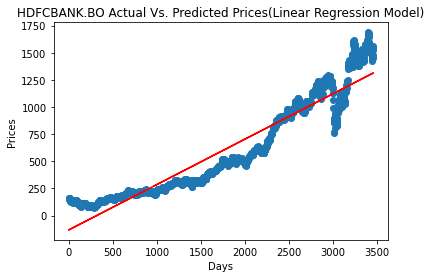

In [86]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, Y_pred, color='r')
plt.ylabel("Prices")
plt.xlabel("Days")
plt.title(f"{stocks} Actual Vs. Predicted Prices(Linear Regression Model)")
plt.show()

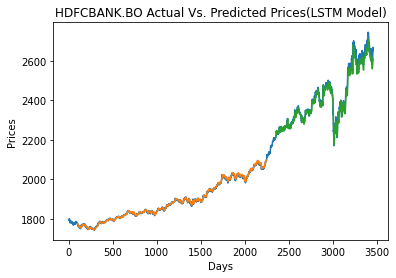

In [87]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.ylabel("Prices")
plt.xlabel("Days")
plt.title(f"{stocks} Actual Vs. Predicted Prices(LSTM Model)")
plt.show()

## **Explaination**

### Linear Regression Model
- After index reset of the yfinance dataset, target variable(Y) and feature variable(X) were defined.
- X and Y were split into X_train, Y_train, X_test, Y_test using train_test_split function from sklearn.model_selection
- Linear regression model was defined as lm.
- lm.fit
- Prediction was made using lm.predict(X_train)
- Model was evaluated using mean_squared_error and mean_absolute_error
- Predicted values and actual values were plotted.

### LSTM Model
- After index reset of the yfinance dataset, train_data and test_data were defined.
- create_dataset function was was defined which converts an array of values into a dataset matrix.
- X_train1, y_train1 was defined using create_dataset function with arguments train_data and time_step = 100
- X_test1, ytest1 was defined using create_dataset function with test_data and time_step = 100
- X_train1 and X_test1 were reshaped.
- LSTM model was defined as model.
- model.fit
- Prediction was made using model.predict
- Model was evaluated using mean_squared_error and mean_absolute_error.
- Predicted values and actual values were plotted.